# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [7]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [8]:
cat=Table.read('./data/dmu26_XID+SPIRE_Bootes_cat.fits')


In [9]:
cat[0:10]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J142700.836+321407.276,216.753484405971,32.235354434068206,0.5181373,0.96481246,0.17091079,0.7522828,1.313801,0.30399126,1.0663928,1.8118899,0.41987807,-0.15231742,-0.3637005,-0.834284,0.034276802,0.05270037,0.07449747,1.0002056,1.004693,0.998525,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J142649.629+321323.644,216.706786605971,32.22323456406821,0.29963076,0.6771589,0.09583339,0.32197103,0.7174295,0.09441982,0.4125783,0.9460281,0.112367,-0.15231742,-0.3637005,-0.834284,0.034276802,0.05270037,0.07449747,0.9982191,0.99867177,0.99847007,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J142650.197+321317.212,216.709152215971,32.221447714068205,0.31076995,0.70953465,0.09284371,0.33915383,0.8437762,0.096350856,0.477099,1.0945992,0.14065786,-0.15231742,-0.3637005,-0.834284,0.034276802,0.05270037,0.07449747,0.9993513,0.9981868,0.99949646,2000.0,2000.0,2000.0,0.0,0.0,0.001
HELP_J142650.481+321328.606,216.710337725971,32.2246129140682,0.25633204,0.588388,0.068498164,0.30167797,0.7077077,0.07425002,0.29406837,0.7126755,0.08021254,-0.15231742,-0.3637005,-0.834284,0.034276802,0.05270037,0.07449747,1.0000966,0.9997011,0.9995503,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J142651.454+321344.158,216.714390785971,32.228932854068205,0.34081006,0.7734366,0.10010906,0.38884783,0.9073696,0.10314026,0.27654898,0.6801233,0.06813106,-0.15231742,-0.3637005,-0.834284,0.034276802,0.05270037,0.07449747,0.99910563,0.99990386,0.99850297,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J142651.490+321329.674,216.71454033597098,32.224909394068206,0.25982952,0.5902841,0.075178154,0.28962812,0.7151569,0.07929154,0.2900239,0.67774725,0.07354246,-0.15231742,-0.3637005,-0.834284,0.034276802,0.05270037,0.07449747,0.9998783,0.99932253,0.9986531,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J142652.482+321341.701,216.718675535971,32.22825025406821,0.757297,1.527175,0.2474672,0.55363894,1.1563303,0.16103336,0.4141008,0.8512313,0.11731172,-0.15231742,-0.3637005,-0.834284,0.034276802,0.05270037,0.07449747,0.99952626,0.9989321,0.99900925,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J142653.264+321415.703,216.721933195971,32.237695404068205,1.3561426,2.6210709,0.44883752,1.1579574,2.229206,0.37388504,0.9845525,1.9792428,0.323721,-0.15231742,-0.3637005,-0.834284,0.034276802,0.05270037,0.07449747,1.0001755,0.998168,0.99970704,2000.0,2000.0,2000.0,0.0,0.0,0.0


## Look at Symmetry of PDFs to determine depth level of catalogue

/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)
/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


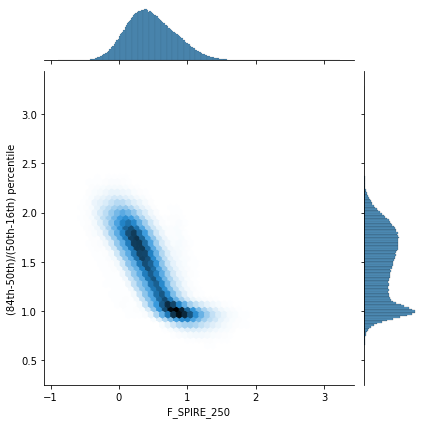

In [7]:
skew=(cat['FErr_SPIRE_250_u']-cat['F_SPIRE_250'])/(cat['F_SPIRE_250']-cat['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_250']),y=skew, kind='hex')


g.savefig('../../data/figs/sk_SPIRE250_Bootes.pdf', bbox='tight')
g.savefig('../../data/figs/sk_SPIRE250_Bootes.png', bbox='tight')

/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)
/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


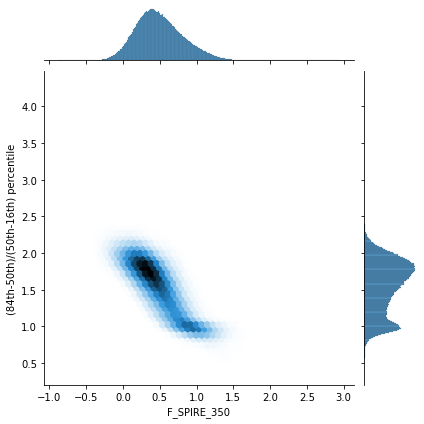

In [8]:
skew=(cat['FErr_SPIRE_350_u']-cat['F_SPIRE_350'])/(cat['F_SPIRE_350']-cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_350']),y=skew, kind='hex')

g.savefig('../../data/figs/sk_SPIRE350_Bootes.pdf', bbox='tight')
g.savefig('../../data/figs/sk_SPIRE350_Bootes.png', bbox='tight')

/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)
/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


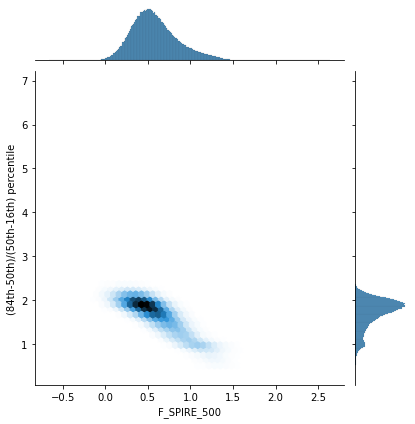

In [9]:
skew=(cat['FErr_SPIRE_500_u']-cat['F_SPIRE_500'])/(cat['F_SPIRE_500']-cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_500']),y=skew, kind='hex')

g.savefig('../../data/figs/sk_SPIRE500_Bootes.pdf', bbox='tight')
g.savefig('../../data/figs/sk_SPIRE500_Bootes.png', bbox='tight')

## Add flag to catalogue

In [13]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_250'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_350'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_500'))

In [14]:
ind_250=(cat['Pval_res_250']>0.5) | (cat['F_SPIRE_250'] < 5)
ind_350=(cat['Pval_res_350']>0.5) | (cat['F_SPIRE_350'] < 5)
ind_500=(cat['Pval_res_500']>0.5) | (cat['F_SPIRE_500'] < 10)


In [15]:
print(ind_250.sum(),ind_350.sum(),ind_500.sum(),len(cat))

373662 378968 457338 495159


In [16]:
cat['flag_spire_250'][ind_250]=True
cat['flag_spire_350'][ind_350]=True
cat['flag_spire_500'][ind_500]=True

In [17]:
cat.write('./data/dmu26_XID+SPIRE_Bootes_cat_20190325.fits', format='fits',overwrite=True)


In [18]:
ind_good=cat['flag_spire_250'] | cat['flag_spire_350'] | cat['flag_spire_500']

In [19]:
np.invert(ind_good).sum()

19912

In [20]:
cat[np.invert(ind_good)][0:10]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_spire_250,flag_spire_350,flag_spire_500
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool
HELP_J142721.471+321816.769,216.83946220880298,32.3046580059389,10.840308,15.537004,6.392016,9.467144,15.37302,4.1701465,21.541012,28.387066,14.606087,-0.3737437,-2.0855768,-11.295267,0.029916666,1.4683938,6.198235,0.9998108,1.2490101,1.0007342,2000.0,2000.0,5.0,0.002,0.0,0.244,False,False,False
HELP_J142718.455+321900.129,216.82689765616198,32.316702527634,7.032348,10.879709,3.4062154,6.554594,12.160577,2.3063724,13.437169,19.280415,7.2725143,-0.3737437,-2.0855768,-11.295267,0.029916666,1.4683938,6.198235,0.9996937,1.155523,1.0007526,2000.0,2000.0,7.0,0.0,0.0,0.001,False,False,False
HELP_J142723.992+322043.699,216.8499672921625,32.34547183834955,11.107132,14.976052,7.298609,13.847146,18.922628,8.507621,17.448008,25.794254,9.166068,-6.432632,-11.536917,-28.924076,3.9276497,5.2466435,8.882508,0.99910355,0.9985476,0.9993728,2000.0,2000.0,2000.0,0.0,0.0,0.245,False,False,False
HELP_J142724.038+322008.679,216.850156275971,32.3357442540682,27.8038,32.210426,23.363884,17.781862,22.274897,13.011327,14.900539,25.060555,5.796748,-6.432632,-11.536917,-28.924076,3.9276497,5.2466435,8.882508,0.9986042,0.99915683,0.9989131,2000.0,2000.0,2000.0,0.0,0.002,0.1,False,False,False
HELP_J142729.499+322150.136,216.87291295616197,32.363926727634,19.98135,23.958878,16.046968,20.13577,25.019522,14.806766,13.65771,24.011484,4.595824,-6.432632,-11.536917,-28.924076,3.9276497,5.2466435,8.882508,0.9986977,1.0005065,0.9986323,2000.0,2000.0,2000.0,0.0,0.002,0.235,False,False,False
HELP_J142740.624+322253.539,216.91926685616198,32.381538627634,6.8336787,10.254948,3.4267933,10.86978,15.182438,6.7738404,21.440535,26.228083,14.989732,-6.432632,-11.536917,-28.924076,3.9276497,5.2466435,8.882508,1.0000291,0.99845845,0.9986969,2000.0,2000.0,2000.0,0.0,0.002,0.08,False,False,False
HELP_J142741.735+322357.842,216.92389675616198,32.399400627634,17.80698,22.729872,13.025569,19.670105,25.436626,13.569547,15.956729,25.719988,6.4770455,-6.432632,-11.536917,-28.924076,3.9276497,5.2466435,8.882508,0.9995516,1.0002412,1.0022702,2000.0,2000.0,2000.0,0.0,0.0,0.317,False,False,False
HELP_J142742.429+322346.602,216.92678655616197,32.396278427634,7.518636,11.799726,3.4404154,10.550463,16.24958,5.3471074,11.563306,20.206478,4.1525264,-6.432632,-11.536917,-28.924076,3.9276497,5.2466435,8.882508,1.0005778,0.9991601,1.0006163,2000.0,2000.0,2000.0,0.0,0.001,0.28,False,False,False
